# <center> Trabajo 2
Nombre: Juan Licanqueo

El trabajo 2 consiste en usar disponibles de vino de la clase 2:

Los datos los puede bajar desde: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data. 

Recuerde que tienen clase de acuerdo al tipo de vino en la columna 0.
1. Defina un conjunto de prueba y uno de test. Recuerde que si hay diferentes clases debe hacer muestreo estratificado para tener ejemplos de cada clase.
2. Aplique el SVM  con regularización para ver su clasificación.
3. Aplique SVM con kernel de base radial y regularización.
4. ¿Cúal modelo logró mejor clasificación?

### Importamos las librerias .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os

### Definimos el directorio de trabajo.

In [2]:
os.chdir('/Users/Juan/Desktop/trabajo_1/')
os.getcwd()

'C:\\Users\\Juan\\Desktop\\trabajo_1'

### Cargaremos  los datos de las propiedades del Vino desde UCI machine learning repository con el siguiente código y visualizaremos su contenido.

In [3]:
#Crearemos una variable para guardar el dataset de VINOS sin encabezados.
Vinos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                    header=None)
#-----------------------------------------------------------------------------------------------
#A continuación agregaremos los encabezados, los nombres de las variables por columna.
Vinos.columns = ['Etiqueta_Clase',
                 'Alcohol',
                 'Acido_Malico',
                 'Ceniza',
                 'Alcalinidad_Cenizas', 
                 'Magnesio', 
                 'Fenoles_Totales',
                 'Flavonoides',
                 'Fenoles_No_Flavonoides', 
                 'Proantocianinas',
                 'Intensidad_Color', 
                 'Tono',
                 'OD280/OD315_Vinos_Diluidos',
                 'Prolina']
#--------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la dimensión de los dataset.
Vinos.shape

(178, 14)

### Observaremos como se comportan los datos aplicando un resumen estadístico, de esta forma podremos las diferencias de la magnitud de rango de las diferentes variables.

In [4]:
#Aplicaremos la función describe para generar el resumen estadístico.
Vinos.describe()

,Etiqueta_Clase,Alcohol,Acido_Malico,Ceniza,Alcalinidad_Cenizas,Magnesio,Fenoles_Totales,Flavonoides,Fenoles_No_Flavonoides,Proantocianinas,Intensidad_Color,Tono,OD280/OD315_Vinos_Diluidos,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### A continuación separaremos las variables independientes de la dependiente en dos datasets.

In [5]:
#Definiremos el dataset de las variables independientes como X.
x = Vinos.iloc[:,1:14].values
x.shape

(178, 13)

In [6]:
#Definiremos el dataset de la variable dependiente como Y.
y = Vinos.iloc[:,0].values
y.shape

(178,)

### Ahora dividiremos nuestras variables en datos de entrenamiento y prueba para el modelo que utilicemos.

In [7]:
#Importaremos la clase train test split de la la librería sklearn para dividir los datos.
from sklearn.model_selection import train_test_split
#--------------------------------------------------------------------
#Particionamos los datos, con 75% para entrenar y 25% para prueba, tambien estratificaremos la
#variable independiente.
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size = 0.25,
                                                   stratify = y,
                                                   random_state = 0)

### A continuación pasaremos a escalar los datos independientes para estandarizar los valores y evitar que algunas variables predominen más sobre las demás.

In [8]:
#Importaremos la clase escalamiento estandar de la librería sklearn para realizar el escalonamiento 
#estandarizado de los datos.
from sklearn.preprocessing import StandardScaler
#---------------------------------------------------------------------------------------------
#Ahora instanciaremos la clase que nos transformara los datos.
SC_x = StandardScaler()
#----------------------------------------------------------------------------------------------
#En primer lugar ocuparemos los datos de entrenamiento de las variables independientes y 
#utilizaremos la función fit_transform para ajustar los datos y estandarizarlos, de esta forma 
#los datos se escalaran de forma automática y se obtendra la media y la varianza.
X_train = SC_x.fit_transform(X_train)
#-----------------------------------------------------------------------------------------------
#En segundo lugar escalaremos los datos de prueba de las variables independientes, para esto solo
#utilizaremos la función transform y asi podremos estandarizar los datos con la media y varianza 
#que se calculo anteriormente de forma automática.
X_test = SC_x.transform(X_test)

# <center> Ahora pasaremos a generar el modelo de clasificación utlizando SVM con  regularización.

### El primer modelo contendra todas las variables independientes con regularización.

In [9]:
#Importaremos la clase SVM desde la librería sklearn para crear el modelo.
from sklearn.svm import SVC
#------------------------------------------------------------------------------------------------
#A continuacion crearemos un objeto para instanciar la clase con regularización (C) y definiremos 
#una semilla, con esto generaremos el modelo de clasificación.
Cl_SVM = SVC(kernel = 'linear', C=1.0, random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento de las variables independientes y de la variable dependiente.
Cl_SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [10]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con SVM. 
y_pred_SVM = Cl_SVM.predict(X_test)

### El paso siguiente sera verificar que tan bien predice el modelo, para esto ocuparemos la matriz de confusión.

<function matplotlib.pyplot.show(close=None, block=None)>

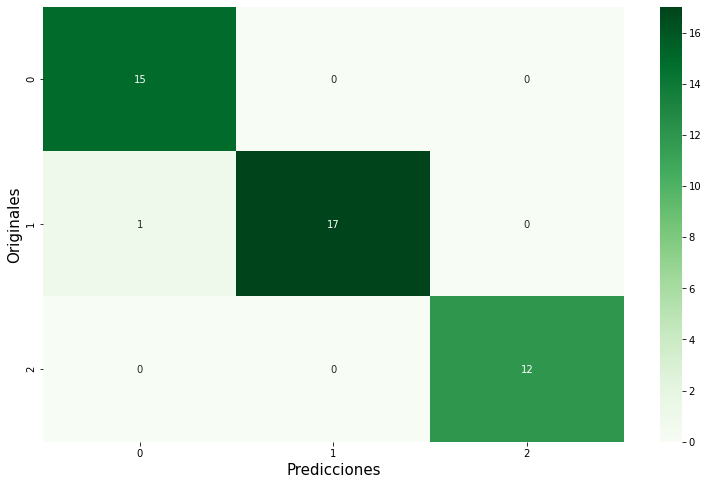

In [11]:
#Importaremos la clase de la matriz de confusión desde la librearía de sklearn.
from sklearn.metrics import confusion_matrix
#-------------------------------------------------------------------------------------------------
#A continuación crearemos una variable donde guardamos los resultados de la matriz de confusión,
#para eso utilizaremos el conjunto de datos de prueba original de la variable independiente y 
#la compararemos con los datos predichos.
Mat_Conf_SVM = confusion_matrix(y_test, y_pred_SVM)
#--------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la matriz de confusión para que tan bueno es nuestro modelo
plt.figure(figsize = (13,8))
sns.heatmap(Mat_Conf_SVM, 
            cmap = 'Greens',
           annot = True)
plt.xlabel('Predicciones',
          fontsize = 15)
plt.ylabel('Originales',
          fontsize = 15)
plt.show

### Calcularemos la presición del modelo.

In [12]:
# Accuracy de test del modelo 
from sklearn.metrics import accuracy_score
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred_SVM,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 97.77777777777777%


### Ahora volveremos a calcular las predicciones pero con 2 variables independientes para poder gráficar.

In [13]:
#Definiremos el dataset de las variables independientes como X, aca solo utilizaremos 2 variable,
#estas serán ALCOHOL y PROLINA.
x_2 = Vinos.iloc[:,[1,13]].values
x_2.shape

(178, 2)

In [14]:
#Definiremos el dataset de la variable dependiente como Y.
y_2 = Vinos.iloc[:,0].values
y_2.shape

(178,)

### Ahora dividiremos nuestras variables en datos de entrenamiento y prueba para el modelo que utilicemos.

In [15]:
#Particionamos los datos, con 75% para entrenar y 25% para prueba tambien estratificaremos la
#variable independiente.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, 
                                                    y_2,
                                                   test_size = 0.25,
                                                   stratify = y_2,
                                                   random_state = 0)

### A continuación pasaremos a escalar los datos independientes para estandarizar los valores y evitar que algunas variables predominen más sobre las demás.

In [16]:
#Ahora instanciaremos la clase que nos transformara los datos.
SC_x_2 = StandardScaler()
#----------------------------------------------------------------------------------------------
#En primer lugar ocuparemos los datos de entrenamiento de las variables independientes y 
#utilizaremos la función fit_transform para ajustar los datos y estandarizarlos, de esta forma 
#los datos se escalaran de forma automática y se obtendra la media y la varianza.
X_train_2 = SC_x.fit_transform(X_train_2)
#-----------------------------------------------------------------------------------------------
#En segundo lugar escalaremos los datos de prueba de las variables independientes, para esto solo
#utilizaremos la función transform y asi podremos estandarizar los datos con la media y varianza 
#que se calculo anteriormente de forma automática.
X_test_2 = SC_x.transform(X_test_2)

### Ahora pasaremos a generar el modelo de clasificación utlizando SVM con regularización, con dos variables independientes.

In [17]:
#A continuacion crearemos un objeto para instanciar la clase con regularización (C) y definiremos 
#una semilla, con esto generaremos el modelo de clasificación.
Cl_SVM_2 = SVC(kernel = 'linear', C=1.0, random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento de las variables independientes y de la variable dependiente.
Cl_SVM_2.fit(X_train_2, y_train_2)

SVC(kernel='linear', random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [18]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con SVM para dos variables independientes. 
y_pred_SVM_2 = Cl_SVM_2.predict(X_test_2)

### Vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto de entrenamiento.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


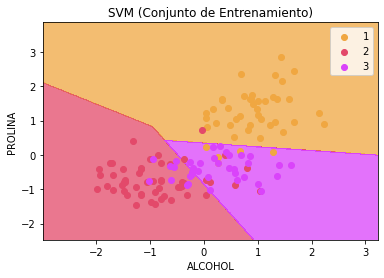

In [19]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2, y_train_2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_SVM_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA'))(i), label = j)
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('ALCOHOL')
plt.ylabel('PROLINA')
plt.legend()
plt.show()

### Ahora vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto prueba.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


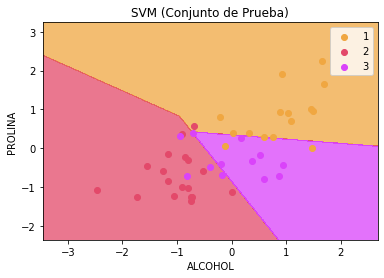

In [20]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Prueba.
X_set, y_set = X_test_2, y_test_2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_SVM_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA'))(i), label = j)
plt.title('SVM (Conjunto de Prueba)')
plt.xlabel('ALCOHOL')
plt.ylabel('PROLINA')
plt.legend()
plt.show()

### Calcularemos la presición del modelo.

In [21]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test_2,
            y_pred    = y_pred_SVM_2,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 82.22222222222221%


# <center> Ahora pasaremos a generar el modelo de clasificación utlizando SVM con  regularización y base radial.

### El primer modelo contendra todas las variables independientes con regularización y base radial.

In [22]:
#A continuacion crearemos un objeto para instanciar la clase con regularización (C), un kernel
#radial y definiremos una semilla, con esto generaremos el modelo de clasificación.
Cl_SVM_Rd = SVC(kernel = 'rbf', C=1.0, random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento de las variables independientes y de la variable dependiente.
Cl_SVM_Rd.fit(X_train, y_train)

SVC(random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [23]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con SVM con kernel radial. 
y_pred_SVM_Rd = Cl_SVM_Rd.predict(X_test)

### El paso siguiente sera verificar que tan bien predice el modelo, para esto ocuparemos la matriz de confusión.

<function matplotlib.pyplot.show(close=None, block=None)>

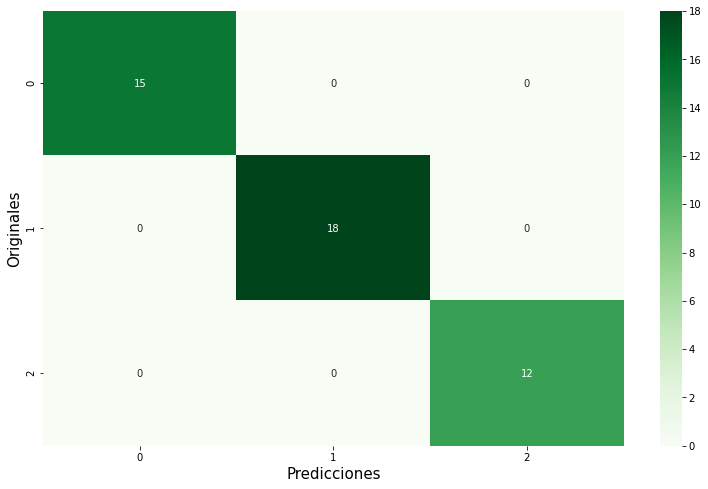

In [24]:
#A continuación crearemos una variable donde guardamos los resultados de la matriz de confusión,
#para eso utilizaremos el conjunto de datos de prueba original de la variable independiente y 
#la compararemos con los datos predichos.
Mat_Conf_SVM_Rd = confusion_matrix(y_test, y_pred_SVM_Rd)
#--------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la matriz de confusión para que tan bueno es nuestro modelo
plt.figure(figsize = (13,8))
sns.heatmap(Mat_Conf_SVM_Rd, 
            cmap = 'Greens',
           annot = True)
plt.xlabel('Predicciones',
          fontsize = 15)
plt.ylabel('Originales',
          fontsize = 15)
plt.show

### Calcularemos la presición del modelo.

In [25]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred_SVM_Rd,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 100.0%


### Ahora volveremos a calcular las predicciones pero con 2 variables independientes para poder gráficar, lo primero que haremos sera generar el modelo de clasificación utlizando SVM con kernet radial y regularización.

In [26]:
#A continuacion crearemos un objeto para instanciar la clase con regularización (C), un kernel
#radial y definiremos una semilla, con esto generaremos el modelo de clasificación.
Cl_SVM_2_Rd = SVC(kernel = 'rbf', C=1.0, random_state = 0)
#------------------------------------------------------------------------------------------------
#El siguiente paso es ajustar el modelo de clasificación con la función fit utilizando los datos 
#de entrenamiento de las variables independientes y de la variable dependiente.
Cl_SVM_2_Rd.fit(X_train_2, y_train_2)

SVC(random_state=0)

### En este paso realizaremos la predicción de los resultados con el conjunto de prueba.

In [27]:
#Crearemos una variable donde guardaremos el vector con la predicciones de cada una de las 
#observaciones de los datos de prueba, para esto utilizaremos el conjunto de datos para prueba
#de las variables independientes creadas con SVM con kernel radial. 
y_pred_SVM_2_Rd = Cl_SVM_2_Rd.predict(X_test_2)

### Vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto de entrenamiento.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


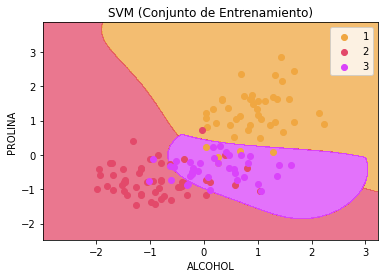

In [28]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2, y_train_2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_SVM_2_Rd.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA'))(i), label = j)
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('ALCOHOL')
plt.ylabel('PROLINA')
plt.legend()
plt.show()

### Ahora vamos a generar una represetación gráfica de los resultados obtenidos en el conjunto prueba.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


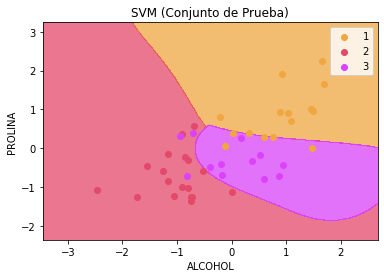

In [29]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Prueba.
X_set, y_set = X_test_2, y_test_2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Cl_SVM_2_Rd.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#F0A741', '#E3496A', '#DA43FA')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#F0A741', '#E3496A', '#DA43FA'))(i), label = j)
plt.title('SVM (Conjunto de Prueba)')
plt.xlabel('ALCOHOL')
plt.ylabel('PROLINA')
plt.legend()
plt.show()

### Calcularemos la presición del modelo.

In [30]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test_2,
            y_pred    = y_pred_SVM_2_Rd,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 82.22222222222221%


### De los modelos generados  podemos decir que en general todos logran una presición ya que alcanzan un calidad superior al 80%, pero hay uno que logro predecir sin errores alcanzando el 100% este fue el que ocupo todas las variables y al crear el modelo se utilizo el kernel radial, en teoría este sería el mejor modelo pero debemos seguir verficando con más datos nuevos para descartar que tenga sobreajuste.